<a href="https://colab.research.google.com/github/KimSungKwon/ufo_data_analysis/blob/main/ufo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFO 출몰 기록을 통해 출몰 예측하기


### 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
ufo = pd.read_csv('/content/drive/MyDrive/Term/nuforc_reports.csv')

ufo.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


### 데이터 가공하기

In [ ]:
# 안쓰는 컬럼 삭제
ufo.drop(['summary', 'stats', 'report_link', 'text', 'posted'], axis=1, inplace=True)

In [ ]:
# date_time 컬럼을 날짜타입으로 변환
ufo['date_time'] = pd.to_datetime(ufo['date_time'])
ufo

,city,state,date_time,shape,duration,city_latitude,city_longitude
0,Chester,VA,2019-12-12 18:43:00,light,5 seconds,37.343152,-77.408582
1,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,41.664800,-72.639300
2,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,45.381383,-75.708501
4,Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,NaN,NaN
...,...,...,...,...,...,...,...
88120,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,33.414036,-111.920920
88121,Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,37.642200,-93.399600
88122,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,27.076210,-82.223280
88123,Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,35.605000,-82.313200


In [ ]:
# 결측치 처리
print('처리 전:')
print(ufo.isnull().sum())
ufo = ufo.dropna(subset=['city_latitude', 'city_longitude', 'date_time'])
print('처리 후:')
print(ufo.isnull().sum())

처리 전:
city                234
state              5235
date_time          1187
shape              2498
duration           3171
city_latitude     16112
city_longitude    16112
dtype: int64
처리 후:
city                 0
state                0
date_time            0
shape             1855
duration          2405
city_latitude        0
city_longitude       0
dtype: int64


In [ ]:
# ufo 타입
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71184 entries, 0 to 88123
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            71184 non-null  object        
 1   state           71184 non-null  object        
 2   date_time       71184 non-null  datetime64[ns]
 3   shape           69329 non-null  object        
 4   duration        68779 non-null  object        
 5   city_latitude   71184 non-null  float64       
 6   city_longitude  71184 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 4.3+ MB


In [ ]:
# 2000년 이전의 레코드 삭제
ufo = ufo[ufo['date_time'] >= '2000']

In [ ]:
import datetime as dt

ufo['year'] = ufo['date_time'].dt.year
ufo['month'] = ufo['date_time'].dt.month
ufo['day'] = ufo['date_time'].dt.day
ufo['Date'] = ufo['date_time'].dt.date
ufo['ord_date'] = ufo['date_time'].map(dt.datetime.toordinal)
ufo

<ipython-input-15-f5f67a3eb09b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo['year'] = ufo['date_time'].dt.year
<ipython-input-15-f5f67a3eb09b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo['month'] = ufo['date_time'].dt.month
<ipython-input-15-f5f67a3eb09b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,city,state,date_time,shape,duration,city_latitude,city_longitude,year,month,day,Date,ord_date
0,Chester,VA,2019-12-12 18:43:00,light,5 seconds,37.343152,-77.408582,2019,12,12,2019-12-12,737405
1,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,41.664800,-72.639300,2019,3,22,2019-03-22,737140
3,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,45.381383,-75.708501,2019,4,17,2019-04-17,737166
5,Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,30.677200,-94.005200,2019,4,2,2019-04-02,737151
6,Tucson,AZ,2019-05-01 11:00:00,unknown,5 minutes,32.259941,-110.927542,2019,5,1,2019-05-01,737180
...,...,...,...,...,...,...,...,...,...,...,...,...
88119,Morgan City,LA,2019-10-02 19:15:00,light,2 minutes,29.699692,-91.069123,2019,10,2,2019-10-02,737334
88120,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,33.414036,-111.920920,2019,10,2,2019-10-02,737334
88121,Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,37.642200,-93.399600,2019,10,2,2019-10-02,737334
88122,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,27.076210,-82.223280,2019,10,2,2019-10-02,737334


In [ ]:
ufo.drop(['city', 'duration', 'date_time'], axis=1, inplace=True)

In [ ]:
# 미국의 데이터만 다루기
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

ufo = ufo[ufo['state'].isin(us_states)]

ufo

,state,shape,city_latitude,city_longitude,year,month,day,Date,ord_date
0,VA,light,37.343152,-77.408582,2019,12,12,2019-12-12,737405
1,CT,circle,41.664800,-72.639300,2019,3,22,2019-03-22,737140
5,TX,disk,30.677200,-94.005200,2019,4,2,2019-04-02,737151
6,AZ,unknown,32.259941,-110.927542,2019,5,1,2019-05-01,737180
7,AZ,circle,33.371500,-111.436900,2019,4,10,2019-04-10,737159
...,...,...,...,...,...,...,...,...,...
88119,LA,light,29.699692,-91.069123,2019,10,2,2019-10-02,737334
88120,AZ,formation,33.414036,-111.920920,2019,10,2,2019-10-02,737334
88121,MO,light,37.642200,-93.399600,2019,10,2,2019-10-02,737334
88122,FL,formation,27.076210,-82.223280,2019,10,2,2019-10-02,737334


# US 공기오염



## 데이터 불러오기

In [ ]:
# air2는 2000~2019년도까지의 데이터
air = pd.read_csv('/content/drive/MyDrive/Term/air2.csv')

air.head()

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,2019-01-03,4,Good,PM10,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
1,2019-01-06,31,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
2,2019-01-09,9,Good,PM10,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
3,2019-01-12,43,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago
4,2019-01-15,28,Good,PM2.5,1,Aberdeen,SD,South Dakota,45.4649,-98.4686,28315.0,661.0,America/Chicago


## 데이터 가공하기

In [ ]:
air[(air['Date'] == '2019-12-12') & (air['state_id'] == 'VA')]

,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
15275,2019-12-12,31,Good,Ozone,1,Blacksburg,VA,Virginia,37.2300,-80.4279,94398.0,868.0,America/New_York
63560,2019-12-12,25,Good,NO2,1,Harrisonburg,VA,Virginia,38.4362,-78.8735,74901.0,1192.0,America/New_York
124588,2019-12-12,41,Good,PM2.5,3,Richmond,VA,Virginia,37.5295,-77.4756,1025117.0,1476.0,America/New_York
125836,2019-12-12,21,Good,NO2,1,Roanoke,VA,Virginia,37.2785,-79.9581,216388.0,900.0,America/New_York
157722,2019-12-12,25,Good,PM2.5,2,Virginia Beach,VA,Virginia,36.7335,-76.0435,1475522.0,711.0,America/New_York
165167,2019-12-12,31,Good,PM2.5,1,Winchester,VA,Virginia,39.1735,-78.1746,74593.0,1172.0,America/New_York


> 필요한 컬럼만 남기고,
>
> Category의 값을 숫자로 변환,
>
> 같은 state, 같은 Date의 레코드들을 합치고 Category, AQI는 평균값으로.

In [ ]:
air = air[['Date', 'AQI', 'Category', 'state_id']]

In [ ]:
category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 4,
    'Very Unhealthy': 5,
    'Hazardous': 6
}

air['Category'] = air['Category'].map(category_mapping)

In [ ]:
air = air.groupby(['Date', 'state_id']).agg({'Category': 'mean', 'AQI': 'mean'}).reset_index()

In [ ]:
air = air.rename(columns={'state_id': 'state'})
air = air.rename(columns={'Category': 'pollution'})

air['Date'] = pd.to_datetime(air['Date'])
air['year'] = air['Date'].dt.year
air['month'] = air['Date'].dt.month
air['day'] = air['Date'].dt.day

In [ ]:
air[(air['Date'] == '2019-12-12') & (air['state'] == 'VA')]

,Date,state,pollution,AQI,year,month,day
377178,2019-12-12,VA,1.0,29.0,2019,12,12


## 데이터 합치기

In [ ]:
ufo['Date'] = pd.to_datetime(ufo['Date'])
air['Date'] = pd.to_datetime(air['Date'])

df = pd.merge(ufo, air, on=['year', 'month', 'day', 'state'], how='left')

<ipython-input-25-dab4421291f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ufo['Date'] = pd.to_datetime(ufo['Date'])


In [ ]:
df = df[['state', 'shape', 'city_latitude', 'city_longitude', 'year', 'month', 'day', 'Date_x', 'pollution', 'AQI']]
df

,state,shape,city_latitude,city_longitude,year,month,day,Date_x,pollution,AQI
0,VA,light,37.343152,-77.408582,2019,12,12,2019-12-12,1.000000,29.000000
1,CT,circle,41.664800,-72.639300,2019,3,22,2019-03-22,1.000000,41.400000
2,TX,disk,30.677200,-94.005200,2019,4,2,2019-04-02,1.363636,46.090909
3,AZ,unknown,32.259941,-110.927542,2019,5,1,2019-05-01,1.400000,44.100000
4,AZ,circle,33.371500,-111.436900,2019,4,10,2019-04-10,2.000000,76.200000
...,...,...,...,...,...,...,...,...,...,...
65415,LA,light,29.699692,-91.069123,2019,10,2,2019-10-02,1.571429,49.714286
65416,AZ,formation,33.414036,-111.920920,2019,10,2,2019-10-02,1.200000,43.100000
65417,MO,light,37.642200,-93.399600,2019,10,2,2019-10-02,1.142857,36.285714
65418,FL,formation,27.076210,-82.223280,2019,10,2,2019-10-02,1.000000,35.095238


In [ ]:
print("결측치 처리 전:")
print(df.isnull().sum())
df = df.dropna(subset=['pollution', 'AQI'])
print("결측치 처리 후:")
print(df.isnull().sum())

결측치 처리 전:
state                0
shape             1694
city_latitude        0
city_longitude       0
year                 0
month                0
day                  0
Date_x               0
pollution           26
AQI                 26
dtype: int64
결측치 처리 후:
state                0
shape             1693
city_latitude        0
city_longitude       0
year                 0
month                0
day                  0
Date_x               0
pollution            0
AQI                  0
dtype: int64


# 미국 state 인구 통계 (2000~2019)

In [ ]:
population = pd.read_csv('/content/drive/MyDrive/Term/state_populations_2000_to_2019.csv')

In [ ]:
population

,state_name,state_FIPS,pop_2000,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,...,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019
0,Alabama,1000,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,...,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,4903185
1,Alaska,2000,627499,633316,642691,650884,661569,669488,677325,682297,...,713906,722038,730399,737045,736307,737547,741504,739786,737438,731545
2,Arizona,4000,5166697,5304417,5452108,5591206,5759425,5974834,6192100,6362241,...,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,7278717
3,Arkansas,5000,2678288,2691068,2704732,2722291,2746161,2776221,2815097,2842194,...,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,3017804
4,California,6000,33994571,34485623,34876194,35251107,35558419,35795255,35979208,36226122,...,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,39512223
5,Colorado,8000,4328070,4433068,4504265,4548775,4599681,4660780,4753044,4842259,...,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564,5758736
6,Connecticut,9000,3411726,3428433,3448382,3467673,3474610,3477416,3485162,3488633,...,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665,3565287
7,Delaware,10000,786411,794620,804131,814905,826639,839906,853022,864896,...,899595,907316,915188,923638,932596,941413,949216,957078,967171,973764
8,District of Columbia,11000,571744,578042,579585,577777,579796,582049,583978,586409,...,605085,619602,634725,650431,662513,675254,686575,695691,702455,705749
9,Florida,12000,16047118,16353869,16680309,16981183,17375259,17783868,18088505,18277888,...,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325,21477737


In [ ]:
state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS",
    "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT",
    "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM",
    "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
    "District of Columbia": "DC"
}


In [ ]:
# 필요 없는 컬럼 삭제
population.drop(['state_FIPS'], axis=1, inplace=True)

In [ ]:
# state의 값을 약자로 맵핑
population["state_name"] = population["state_name"].map(state_mapping)
population

,state_name,pop_2000,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,...,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019
0,AL,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,4677464,...,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,4903185
1,AK,627499,633316,642691,650884,661569,669488,677325,682297,688125,...,713906,722038,730399,737045,736307,737547,741504,739786,737438,731545
2,AZ,5166697,5304417,5452108,5591206,5759425,5974834,6192100,6362241,6499377,...,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,7278717
3,AR,2678288,2691068,2704732,2722291,2746161,2776221,2815097,2842194,2867764,...,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,3017804
4,CA,33994571,34485623,34876194,35251107,35558419,35795255,35979208,36226122,36580371,...,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,39512223
5,CO,4328070,4433068,4504265,4548775,4599681,4660780,4753044,4842259,4935213,...,5048281,5121771,5193721,5270482,5351218,5452107,5540921,5615902,5695564,5758736
6,CT,3411726,3428433,3448382,3467673,3474610,3477416,3485162,3488633,3502932,...,3579125,3588023,3594395,3594915,3594783,3587509,3578674,3573880,3572665,3565287
7,DE,786411,794620,804131,814905,826639,839906,853022,864896,876211,...,899595,907316,915188,923638,932596,941413,949216,957078,967171,973764
8,DC,571744,578042,579585,577777,579796,582049,583978,586409,590074,...,605085,619602,634725,650431,662513,675254,686575,695691,702455,705749
9,FL,16047118,16353869,16680309,16981183,17375259,17783868,18088505,18277888,18423878,...,18845785,19093352,19326230,19563166,19860330,20224249,20629982,20976812,21299325,21477737


In [ ]:
# 단위 수 설정
for col in population.columns[1:]:
  population[col] = population[col] / 10000

In [ ]:
population["mean"] = population.mean(axis=1)

<ipython-input-34-90c4fdf5b298>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  population["mean"] = population.mean(axis=1)


In [ ]:
population

,state_name,pop_2000,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,pop_2008,...,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,mean
0,AL,445.1849,446.4034,447.2420,449.0591,451.2190,454.5049,459.7688,463.7904,467.7464,...,479.8834,481.5564,483.0460,484.2481,485.3160,486.4745,487.5120,488.7871,490.3185,470.073825
1,AK,62.7499,63.3316,64.2691,65.0884,66.1569,66.9488,67.7325,68.2297,68.8125,...,72.2038,73.0399,73.7045,73.6307,73.7547,74.1504,73.9786,73.7438,73.1545,69.795910
2,AZ,516.6697,530.4417,545.2108,559.1206,575.9425,597.4834,619.2100,636.2241,649.9377,...,647.3497,655.6629,663.4999,673.3840,683.3596,694.5452,704.8876,717.1646,727.8717,634.916045
3,AR,267.8288,269.1068,270.4732,272.2291,274.6161,277.6221,281.5097,284.2194,286.7764,...,294.0407,295.2109,295.9549,296.7726,297.8407,299.0410,300.2997,301.3825,301.7804,287.392390
4,CA,3399.4571,3448.5623,3487.6194,3525.1107,3555.8419,3579.5255,3597.9208,3622.6122,3658.0371,...,3764.1823,3796.0782,3828.0824,3862.5139,3895.3142,3920.9127,3939.9349,3955.7045,3951.2223,3710.844455
5,CO,432.8070,443.3068,450.4265,454.8775,459.9681,466.0780,475.3044,484.2259,493.5213,...,512.1771,519.3721,527.0482,535.1218,545.2107,554.0921,561.5902,569.5564,575.8736,503.393030
6,CT,341.1726,342.8433,344.8382,346.7673,347.4610,347.7416,348.5162,348.8633,350.2932,...,358.8023,359.4395,359.4915,359.4783,358.7509,357.8674,357.3880,357.2665,356.5287,352.662555
7,DE,78.6411,79.4620,80.4131,81.4905,82.6639,83.9906,85.3022,86.4896,87.6211,...,90.7316,91.5188,92.3638,93.2596,94.1413,94.9216,95.7078,96.7171,97.3764,88.564190
8,DC,57.1744,57.8042,57.9585,57.7777,57.9796,58.2049,58.3978,58.6409,59.0074,...,61.9602,63.4725,65.0431,66.2513,67.5254,68.6575,69.5691,70.2455,70.5749,62.335955
9,FL,1604.7118,1635.3869,1668.0309,1698.1183,1737.5259,1778.3868,1808.8505,1827.7888,1842.3878,...,1909.3352,1932.6230,1956.3166,1986.0330,2022.4249,2062.9982,2097.6812,2129.9325,2147.7737,1879.234070


# 통계 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### UFO의 모양 분포

<Axes: xlabel='shape', ylabel='count'>

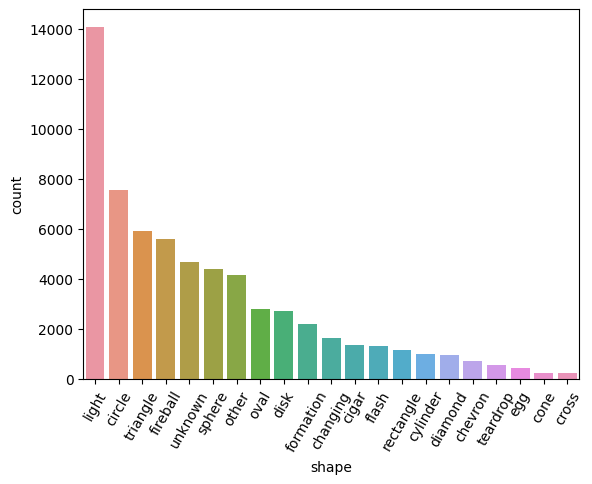

In [ ]:
chart = sns.countplot(x='shape', data=df, order = df['shape'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart

## UFO가 발견된 상위 25개 주(state)

<Axes: xlabel='state', ylabel='count'>

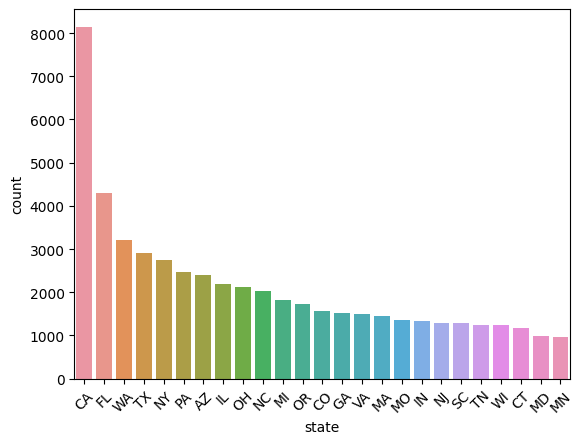

In [ ]:
top_25_state = df['state'].value_counts().nlargest(25).index
chart2 = sns.countplot(x='state', data=df, order = top_25_state)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2

## 년도별 UFO 관측 수

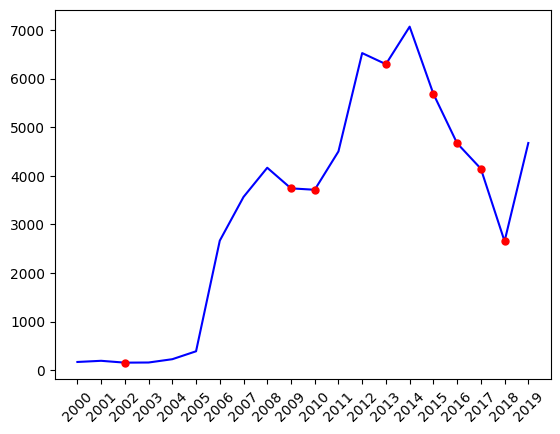

In [ ]:
counts = df['year'].value_counts().sort_index()
decreasing_indices = counts.diff() < 0

chart3 = plt.plot(counts.index, counts.values, color='blue')

# 감소하는 부분의 선 색상 설정
decreasing_indices = counts.diff() < 0
for i, idx in enumerate(decreasing_indices):
    if idx:
        plt.plot(counts.index[i], counts.values[i], marker='o', markersize=5, color='red')

plt.xticks(counts.index.astype(int), rotation=45)
plt.show()

## UFO 관측날짜의 대기 오염도

In [ ]:
entire_air = pd.read_csv('/content/drive/MyDrive/Term/air2.csv')

entire_air = entire_air[['Date', 'AQI', 'Category', 'state_id']]
category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 4,
    'Very Unhealthy': 5,
    'Hazardous': 6
}

entire_air['Category'] = entire_air['Category'].map(category_mapping)

entire_air = entire_air.groupby(['Date', 'state_id']).agg({'Category': 'mean', 'AQI': 'mean'}).reset_index()

entire_air = entire_air.rename(columns={'state_id': 'state'})
entire_air = entire_air.rename(columns={'Category': 'pollution'})

entire_air['Date'] = pd.to_datetime(entire_air['Date'])
entire_air

,Date,state,pollution,AQI
0,2000-01-01,AK,1.500000,49.500000
1,2000-01-01,AL,1.583333,50.583333
2,2000-01-01,AR,1.714286,65.285714
3,2000-01-01,AZ,1.545455,50.000000
4,2000-01-01,CA,2.088235,77.088235
...,...,...,...,...
378167,2019-12-31,VT,1.000000,24.500000
378168,2019-12-31,WA,1.210526,25.842105
378169,2019-12-31,WI,1.000000,23.222222
378170,2019-12-31,WV,1.000000,14.500000


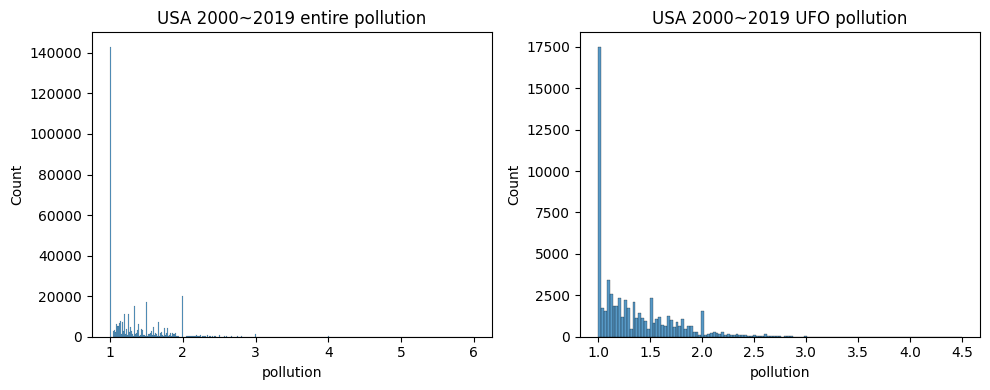

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(x='pollution', data=entire_air, ax=axes[0])
axes[0].set_title('USA 2000~2019 entire pollution')

sns.histplot(x='pollution', data=df, ax=axes[1])
axes[1].set_title('USA 2000~2019 UFO pollution')

plt.tight_layout()

## 관측 수가 낮아진 14~19년도의 대기 오염도 비교

In [ ]:
desc_air = entire_air[entire_air['Date'] >= '2014']
desc_air = desc_air[desc_air['Date'] < '2019']

In [ ]:
desc_air

,Date,state,pollution,AQI
264363,2014-01-01,AK,2.000000,72.666667
264364,2014-01-01,AL,1.500000,42.500000
264365,2014-01-01,AR,1.200000,31.600000
264366,2014-01-01,AZ,2.000000,77.444444
264367,2014-01-01,CA,2.696970,104.696970
...,...,...,...,...
359187,2018-12-31,VT,2.000000,53.000000
359188,2018-12-31,WA,1.263158,36.894737
359189,2018-12-31,WI,1.555556,47.555556
359190,2018-12-31,WV,1.250000,40.500000


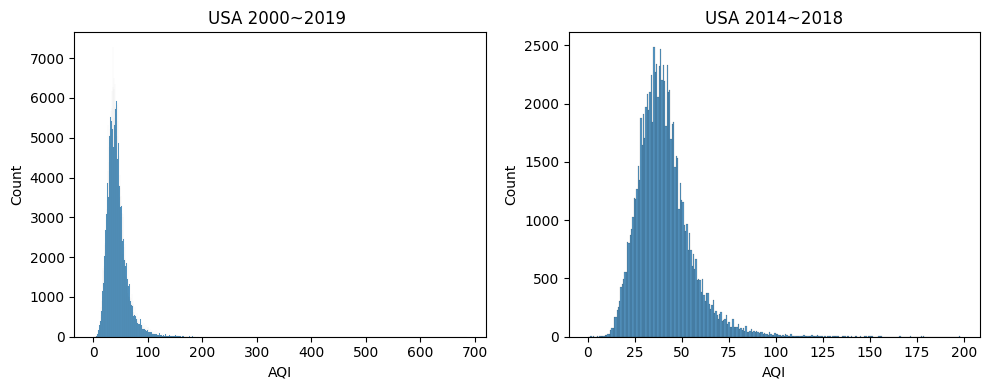

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(x='AQI', data=entire_air, ax=axes[0])
axes[0].set_title('USA 2000~2019 ')

sns.histplot(x='AQI', data=desc_air, ax=axes[1])
axes[1].set_title('USA 2014~2018')

plt.tight_layout()

## 미국 state 별 인구 수 평균

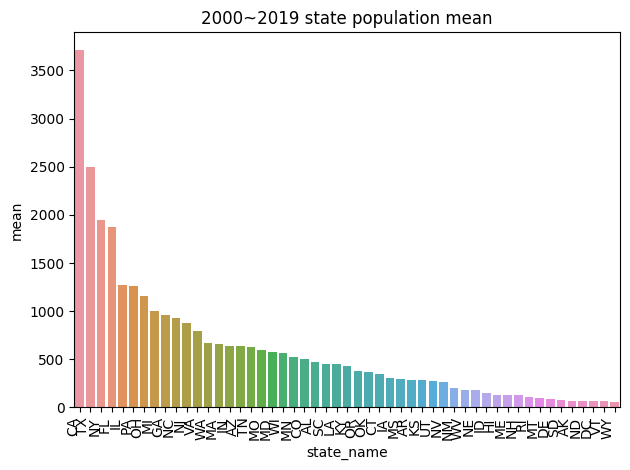

In [ ]:
population_sorted = population.sort_values(by="mean", ascending=False)

sns.barplot(x="state_name", y="mean", data=population_sorted)

plt.title("2000~2019 state population mean")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()

plt.show()

##미국의 인구수 변화 추이

In [ ]:
population2 = pd.DataFrame({
                       '2000': [population['pop_2000'].sum()],
                       '2001': [population['pop_2001'].sum()],
                       '2002': [population['pop_2002'].sum()],
                       '2003': [population['pop_2003'].sum()],
                       '2004': [population['pop_2004'].sum()],
                       '2005': [population['pop_2005'].sum()],
                       '2006': [population['pop_2006'].sum()],
                       '2007': [population['pop_2007'].sum()],
                       '2008': [population['pop_2008'].sum()],
                       '2009': [population['pop_2009'].sum()],
                       '2010': [population['pop_2010'].sum()],
                       '2011': [population['pop_2011'].sum()],
                       '2012': [population['pop_2012'].sum()],
                       '2013': [population['pop_2013'].sum()],
                       '2014': [population['pop_2014'].sum()],
                       '2015': [population['pop_2015'].sum()],
                       '2016': [population['pop_2016'].sum()],
                       '2017': [population['pop_2017'].sum()],
                       '2018': [population['pop_2018'].sum()],
                       '2019': [population['pop_2019'].sum()],
                       })

In [ ]:
population2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,28217.1957,28508.1556,28780.3914,29032.6418,29304.5739,29575.3151,29859.3212,30157.9895,30437.4846,30700.655,30932.6085,31158.0009,31387.4218,31605.7727,31838.6421,32074.2673,32307.1342,32514.7121,32716.7434,32823.9523


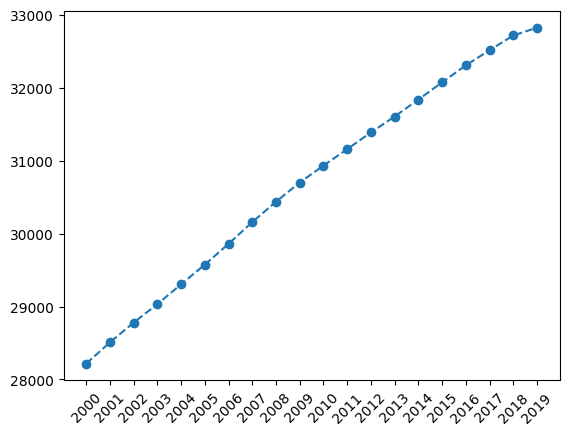

In [ ]:
plt.plot(population2.columns, population2.values[0], marker='o', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# 회귀 예측

In [ ]:
import folium

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = ufo['ord_date'].values.reshape(-1, 1) # values.reshape(-1, 1) 메서드를 이용하여 1차원 배열을 2차원 배열로 변환
Y = ufo[['city_latitude', 'city_longitude']]

# LinearRegression() 메서드를 사용하여 선형 회귀 모델을 생성하고, fit() 메서드를 사용하여 X와 Y 데이터를 이용하여 모델을 학습
lr = LinearRegression()
lr.fit(X, Y)
Y_predict = lr.predict(X)

new_date = input("예상 날짜를 입력하세요(ex: 20AA-BB-CC) : ")
convert_date = dt.datetime.toordinal(pd.to_datetime(new_date))


new_X = pd.DataFrame({'ord_date': [convert_date]})

prediction = lr.predict(new_X)

print(prediction)

lat = prediction[0][0]
lng = prediction[0][1]

map = folium.Map(location=[lat, lng], zoom_start=13, width=800, height=400)
folium.Marker([lat, lng], popup='Seoul').add_to(map)

map

예상 날짜를 입력하세요(ex: 20AA-BB-CC) : 2025-09-12
[[ 38.53916759 -92.71599276]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
